# Import Libraries

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# split
from sklearn.model_selection import train_test_split ,GridSearchCV

# preprocessing
from sklearn.preprocessing import LabelEncoder ,StandardScaler ,PolynomialFeatures

# models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor ,VotingRegressor
from xgboost import XGBRegressor

# metrics
from sklearn.metrics import mean_squared_error ,r2_score

# Read Data

In [3]:
# read dataset
df = pd.read_csv('C:\\Users\\fagr\\Desktop\\ML_projects\\Regression\\medical_cost\\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# show head of data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Age: This is the age of the person in years. It is a numerical feature that ranges from 18 to 64.
It can affect the medical charges because older people may have more health problems and need more care.
    
Sex: This is the gender of the person, either male or female. It is a categorical feature that has two possible values.
It can affect the medical charges because some health conditions may be more prevalent or costly for one gender than the other.

BMI: This is the body mass index of the person, which is a measure of body fat based on height and weight.
It is a numerical feature that ranges from 15.96 to 53.13. It can affect the medical charges 
because higher BMI may indicate obesity, which is a risk factor for many diseases and complications.

Children: This is the number of children a person has. It is a numerical feature that ranges from 0 to 5. 
It can affect the medical charges because having more children may increase the family’s health care needs and expenses.

Smoker: This is the smoking status of the person, either yes or no. It is a categorical feature that has two possible values. 
It can affect the medical charges because smoking is a major cause of many diseases and complications,
and it increases the health care costs significantly.

Region: This is the region where the person lives, either northeast, southeast, southwest, or northwest.
It is a categorical feature that has four possible values. 
It can affect the medical charges because different regions may have different health care systems, prices, and quality.

Charges: This is the amount of the person’s medical insurance fee. It is a numerical feature that ranges from 1121.87 to 63770.43. 
It is the target variable that we want to predict based on the other features

In [6]:
# show some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# count nulls
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA

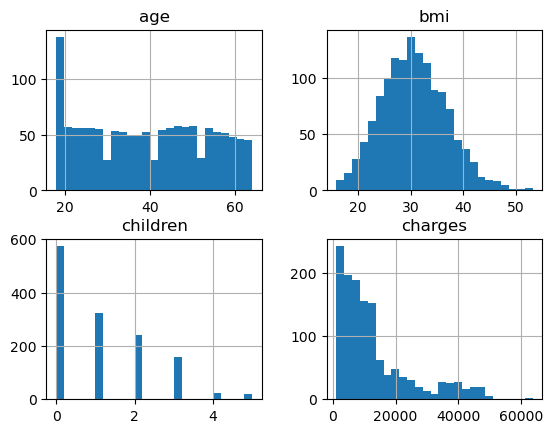

In [11]:
# draw histograms to show distribution of data
df.hist(bins= 25)
plt.show()

In [12]:
# columns in df
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [54]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

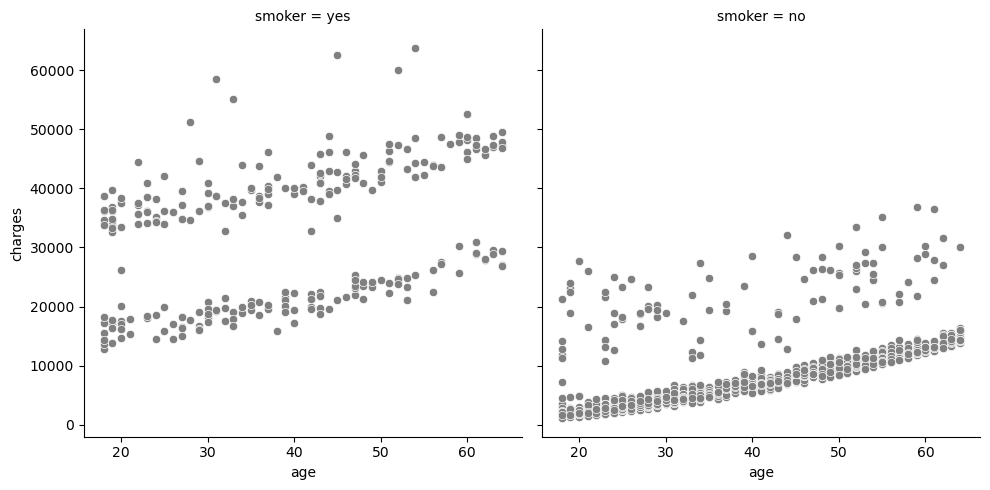

In [55]:
# show relationship between 'age' and 'charges' depending on 'smoker'
sns.relplot( x = 'age' ,y ='charges' , data = df ,color = 'gray' ,col = 'smoker')
plt.show()

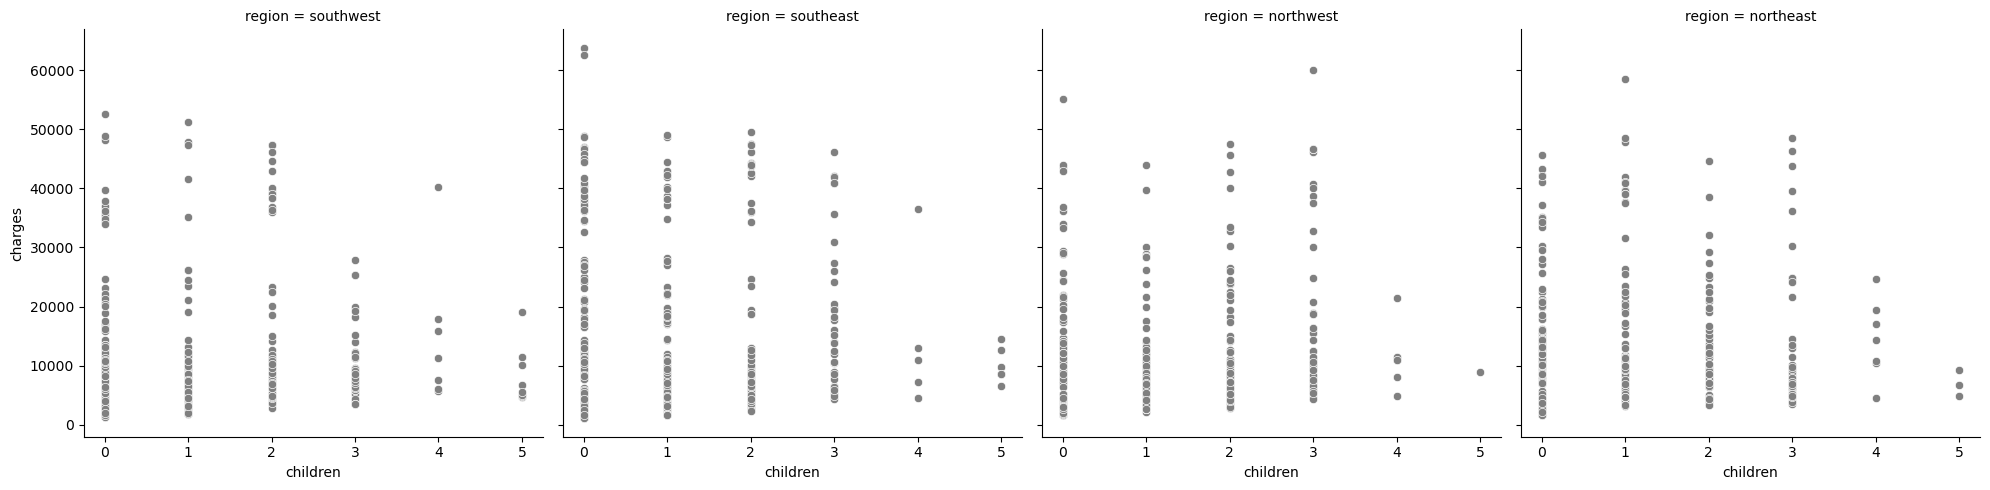

In [35]:
# show relationship between number of 'children' and 'charges' depending on 'region'
sns.relplot( x = 'children' ,y ='charges' , data = df ,color = 'gray' ,col = 'region')
plt.show()

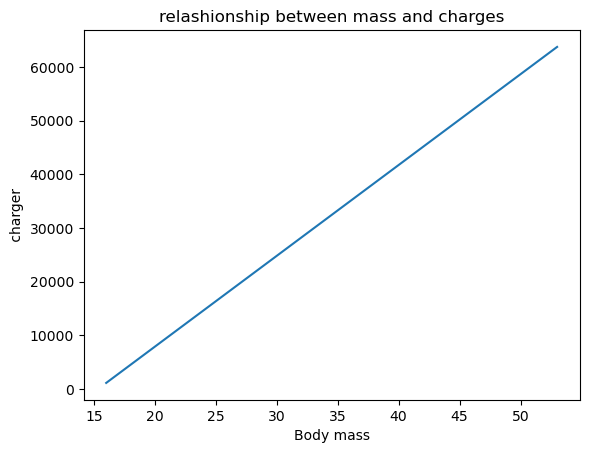

In [37]:
# show relationship between 'bmi' and 'charges'
x = np.linspace(16 , 53 ,50)
y = np.linspace(1122,63770,50)
plt.plot(x , y )
plt.xlabel("Body mass")
plt.ylabel(" charger ")
plt.title("relashionship between mass and charges")
plt.show()

region has no effect on charges values

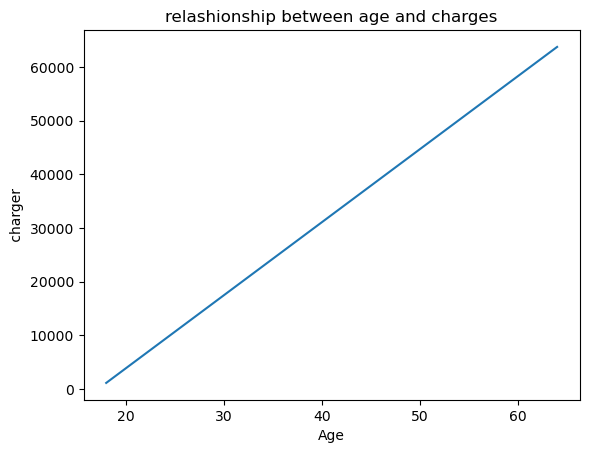

In [38]:
# show relationship between 'age' and 'charges'
x = np.linspace(18 , 64 ,50)
y = np.linspace(1122,63770,50)
plt.plot(x , y )
plt.xlabel("Age")
plt.ylabel(" charger ")
plt.title("relashionship between age and charges")
plt.show()

In [43]:
# numerical columns
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64' , 'float64' ]]

# categorical columns
categ_cols = [col for col in df.columns if df[col].dtype not in ['int64' ,'float64']]

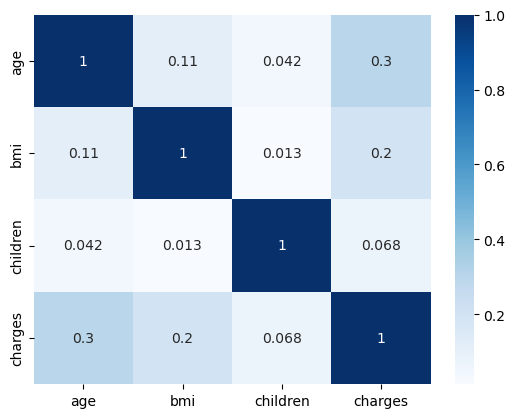

In [51]:
# correlation between numerical columns
sns.heatmap(df[numeric_cols].corr() ,annot = True ,cmap ='Blues')
plt.show()

# Split Dataset

In [311]:
# split to x & y
y = df['charges']
x= df.drop(columns =['charges'] ,axis =1)

In [312]:
#split to train & test
x_train ,x_test ,y_train_full ,y_test_full = train_test_split( x ,y ,test_size =0.2 ,shuffle =True ,random_state =42)

In [313]:
# split to train & validation
x_train ,x_val ,y_train ,y_val= train_test_split(x_train ,y_train_full ,test_size =0.2 ,shuffle = True ,random_state =42)

# Preprocessing

In [314]:
# encode categorical columns
encoded = LabelEncoder()

# encode  categorical columns in x_train
for col in categ_cols:
    encoded_x_train = x_train
    encoded_x_train[col] = encoded.fit_transform(x_train[col].values)
    
# encode categorical columns in x_val
for col in categ_cols:
    encoded_x_val = x_val
    encoded_x_val[col] = encoded.fit_transform(x_val[col].values)
    
# encode categorical columns in x_test
for col in categ_cols:
    encoded_x_test = x_test
    encoded_x_test[col] = encoded.fit_transform(x_test[col].values)
    
encoded_x_train    

,age,sex,bmi,children,smoker,region
94,64,0,31.300,2,1,3
814,36,1,34.430,2,0,2
246,60,0,38.060,0,0,2
794,39,0,31.920,2,0,1
1239,25,0,42.130,1,0,2
...,...,...,...,...,...,...
953,44,1,30.200,2,1,3
450,39,1,29.600,4,0,3
83,48,0,41.230,4,0,1
747,19,1,21.755,0,0,1


In [315]:
# standarize features 
scaler = StandardScaler()
# scale x_train features
scaled_x_train = scaler.fit_transform(encoded_x_train)
# scale x_val features
scaled_x_val = scaler.transform(encoded_x_val)
# scale x_test features
scaled_x_test = scaler.transform(encoded_x_test)

In [316]:
# To DataFrame
x_train_final = pd.DataFrame(scaled_x_train ,columns = x.columns)
y_train_final = pd.DataFrame(y_train ,columns = ['charges'])
x_val_final = pd.DataFrame(scaled_x_val ,columns = x.columns)

x_test_final = pd.DataFrame(scaled_x_test ,columns = x.columns)

In [317]:
y_train_final

,charges
94,47291.05500
814,5584.30570
246,12648.70340
794,7209.49180
1239,3238.43570
...,...
953,38998.54600
450,7512.26700
83,11033.66170
747,1627.28245


# Building model

# LinearRegression

In [318]:
# apply polynomialFeatures
poly = PolynomialFeatures(degree =2)
X_train = poly.fit_transform(x_train_final)
X_test = poly.fit_transform(x_test_final)
X_val = poly.fit_transform(x_val_final)


In [319]:
# apply LinearRegression model
reg = LinearRegression()
reg.fit(x_train_final ,y_train.values.ravel())


LinearRegression()

In [320]:
# predict x_train
y_pred_train = reg.predict(x_train_final)
# mean_square_error
print('Root mean square error is: ' ,mean_squared_error(y_train ,y_pred_train)**0.5)

#r2_score
print('r2_score is: ',r2_score(y_train ,y_pred_train))

Root mean square error is:  5981.723496903059
r2_score is:  0.7451534694319193


In [321]:
# predict x_val
y_pred_val = reg.predict(x_val_final)
# mean_square_error
print('Root mean square error is: ' ,mean_squared_error(y_val ,y_pred)**0.5)

#r2_score
print('r2_score is: ',r2_score(y_val ,y_pred))

Root mean square error is:  6601.100100517917
r2_score is:  0.7268807213159303


# RandomForestRegressor

In [322]:
# apply RandomForestRegressor
rnd = RandomForestRegressor(n_estimators=100 , max_depth =6 ,criterion='squared_error')

In [323]:
# Tune the model
param = {
    'n_estimators' : np.arange(50,150,10),
    'max_depth' : np.arange(5,10)
}

tuned = GridSearchCV(estimator=rnd, param_grid =param ,cv =5 ,scoring ='neg_mean_squared_error')
tuned.fit(x_train_final ,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=6),
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140])},
             scoring='neg_mean_squared_error')

In [324]:
# best parameter
tuned.best_params_

{'max_depth': 5, 'n_estimators': 80}

In [325]:
# apply randomforestclassification model using the best parameters
best_forest = tuned.best_estimator_

In [326]:
best_forest.fit(x_train_final ,y_train)

RandomForestRegressor(max_depth=5, n_estimators=80)

In [327]:
# predict x_train
y_train_pred =best_forest.predict(x_train_final)
print("Root_mean squre error is: " ,mean_squared_error(y_train ,y_train_pred)**0.5)
print("r2_score is: " ,r2_score(y_train ,y_train_pred))

Root_mean squre error is:  3731.0935894901995
r2_score is:  0.9008487158712373


In [328]:
# predict x_val
y_val_pred =best_forest.predict(x_val_final)
print("root_mean squre error is: " ,mean_squared_error(y_val ,y_val_pred)**0.5)
print("r2_score is: " ,r2_score(y_val ,y_val_pred))

root_mean squre error is:  5278.516667175221
r2_score is:  0.8253600838788875


# XGBoost

In [329]:
# apply xgboost
xgb = XGBRegressor()

In [330]:
# Tune xgboost model
param = {
    
    'max_depth':np.arange(4,10,2),
    'learning_rate': [0.1 ,0.2],
    'subsample' : [0.8 ,0.9]
}

tuned_xgb = GridSearchCV(estimator=xgb, param_grid =param ,cv =5 ,scoring ='neg_mean_squared_error')
tuned_xgb.fit(x_train_final ,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([4, 6, 8]),
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [331]:
# best parameters
tuned_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'subsample': 0.9}

In [332]:
# aaply model with best parameters
best_xgb = tuned_xgb.best_estimator_

In [333]:
best_xgb.fit(x_train_final ,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [334]:
# predict x_train
y_xgb_pred_train = best_xgb.predict(x_train_final)
print("Root_mean squre error is: " ,mean_squared_error(y_train ,y_xgb_pred_train)**0.5)
print("r2_score is: " ,r2_score(y_train ,y_xgb_pred_train))

Root_mean squre error is:  3023.73190215597
r2_score is:  0.9348802654600928


In [335]:
# predict x_val
y_xgb_pred_val = best_xgb.predict(x_val_final)
print("Root_mean squre error is: " ,mean_squared_error(y_val ,y_xgb_pred_val)**0.5)
print("r2_score is: " ,r2_score(y_val ,y_xgb_pred_val))

Root_mean squre error is:  5476.597482032277
r2_score is:  0.8120071358782869


In [ ]:
# predict x_test
y_xgb_pred_val = best_xgb.predict(x_test_final)
print("Root_mean squre error is: " ,mean_squared_error(y_val ,y_xgb_pred_val)**0.5)
print("r2_score is: " ,r2_score(y_val ,y_xgb_pred_val))

# VotingRegressor

In [336]:
# apply VotingRegressor
voting_reg = VotingRegressor(estimators =[
    ('linearRegression' ,reg),
    ('randomForest' , best_forest),
    ('xgboost' ,best_xgb)
])

voting_reg.fit(x_train_final ,y_train)

VotingRegressor(estimators=[('linearRegression', LinearRegression()),
                            ('randomForest',
                             RandomForestRegressor(max_depth=5,
                                                   n_estimators=80)),
                            ('xgboost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=Non...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=4,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...))])

In [343]:
# predict x_train
vot_pred = voting_reg.predict(x_train_final)
print("Root_mean squre error is: " ,mean_squared_error(y_train ,vot_pred)**0.5)
print("r2_score is: " ,r2_score(y_train ,vot_pred))

Root_mean squre error is:  3873.019576728782
r2_score is:  0.8931620756717499


In [344]:
# predict x_val
vot_pred = voting_reg.predict(x_val_final)
print("Root_mean squre error is: " ,mean_squared_error(y_val ,vot_pred)**0.5)
print("r2_score is: " ,r2_score(y_val ,vot_pred))

Root_mean squre error is:  5431.018894779338
r2_score is:  0.8151232290505368


In [347]:
# predict x_test
pred_y_test =voting_reg.predict(x_test_final)
print("Root_mean squre error is: " ,mean_squared_error(y_test ,pred_y_test)**0.5)
print("r2_score is: " ,r2_score(y_test ,pred_y_test))

Root_mean squre error is:  4430.95555589741
r2_score is:  0.8735360543710563
